# Employee Turnover Model

## Exploratory Data Analysis (EDA)

### Dataset Description

In this notebook, I will be exploring the components and characteristics of the IBM HR Analytics Employee Attrition & Performance from Kaggle (originally sourced from IBM). In this dataset, there is demographic, compensation, and work/career data on 1,470 employees in a hypothetical company. For the purpose of this exercise which will be written as a report, we will call this company Magdalene Corporation.

### What are we looking for?
 
Context is extremely important in creating a revelant analysis. We are looking to understand the size of the dataset, the feature space, and the patterns in employee groups that could help us understand the common profile of people that may have a higher tendency to leave. We must understand this context in order to make the correct assumptions once modeling begins. This can be achieved through basic examinations through visualization and descriptive statistics.

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import os
from openpyxl import load_workbook
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import string
from scipy.stats import norm, skew
import plotly.figure_factory as ff
import plotly
import chart_studio.plotly as py
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

##### Dataset Properties & Summary Statistics

In [3]:
# Set working dir and import our data
PATH = "C:\\1columbia\\funprojects\\employee-turnover\\"
os.chdir(PATH)

ibm_df = pd.read_excel('data\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [3]:
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print(ibm_df.shape)
print(ibm_df.dtypes.value_counts())

(1470, 35)
int64     26
object     9
dtype: int64


In [5]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# There 0 nulls, but what about empty strings?
object_df = ibm_df.select_dtypes(['object'])
np.where(object_df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [7]:
#Summary statistics
ibm_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


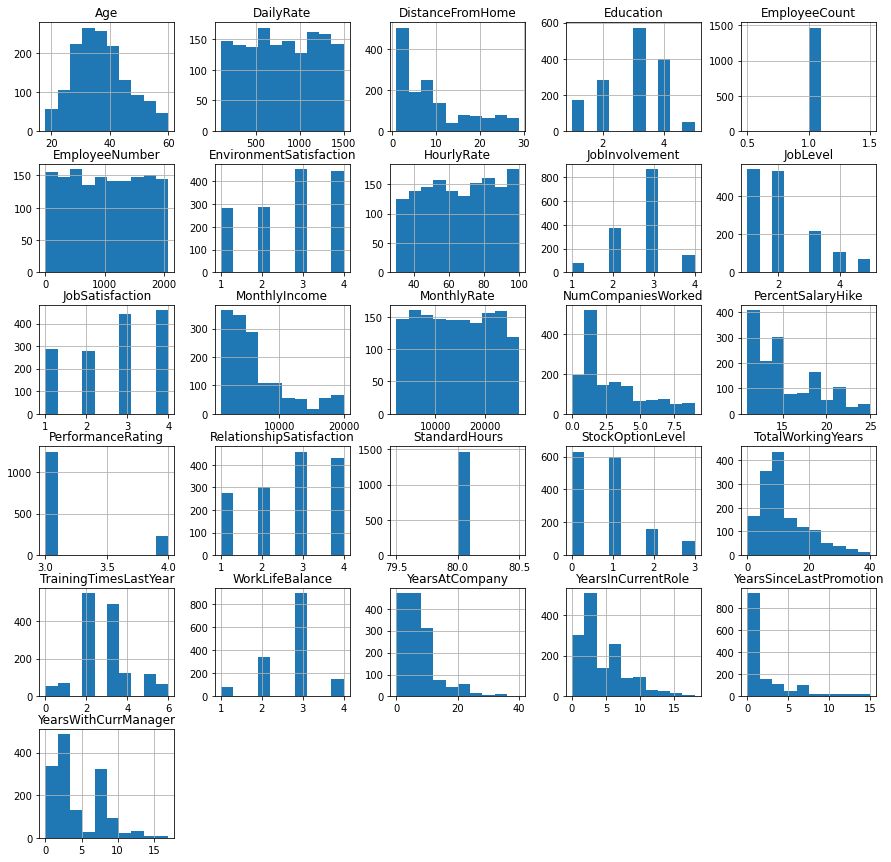

In [8]:
ibm_df.hist(figsize=(15,15))
plt.show()

#### Data Structure

The dataset has a shape of (1470, 35): which means there are 35 variables and 1,470 rows. Of the columns, there are 26 numeric variables and 9 non-numeric variable. There are also no numerical nulls or empty strings.

#### Variable Distribution (Numeric)

There are two constant values:
1. Employee Count
2. Standard Hours 

These variables are left-skewed:
1. Education
2. Environment Satisfaction
3. Job Involvement
4. Job Satisfaction
5. Relationship Satisfaction
6. Work Life Balance

These variables are right-skewed
1. Age
2. Distance from Home
3. Job Level
4. Monthly Income
5. Number of Companies Worked
6. Percent Salary Hike
7. Stock Option Level
8. Total Working Hours
9. Years at Company
10. Years in Current Role
11. Years Since Last Promotion
12. Years with Current Manager (Bimodal)

##### Observing Features by Attrition (Active/Terminated)

To further our understanding and identify bias in the dataset, we must compare the employee data between active employees and terminated employees.

Below is an examination of commonly observed employee features in HR analytics partitioned by active status.

In [9]:
# Looking at a selection of ... 
# Scrap?
favorite_list = []
subset_df = ibm_df[favorite_list]
ibm_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### Department & Job Role

Does high turnover exist in specific departments or job functions?

It appears that turnover happens most frequently in the Sales department, and the Sales Associate role is driving this high department average turnover. There is also notably high turnover for Laboratory Technician. 

In [10]:
# Distribution of jobs/dept in the full dataset

print(ibm_df['JobRole'].value_counts())
print(ibm_df['Department'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


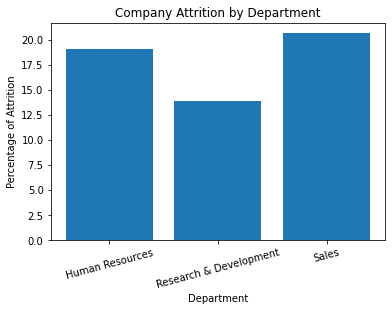

In [16]:
# Department
dept_df = pd.DataFrame(columns=["Department", "% of Leavers"])
col = 0
for x in list(ibm_df['Department'].unique()):
    ratio = ibm_df[(ibm_df['Department']==x)&(ibm_df['Attrition']=="Yes")].shape[0] / ibm_df[ibm_df['Department']==x].shape[0]
    dept_df.loc[col] = (x, ratio*100)
    col += 1  

plot_data = dept_df.groupby(by="Department").sum().reset_index()
plt.bar(plot_data.Department, plot_data['% of Leavers'])

plt.xlabel("Department")
plt.ylabel("Percentage of Attrition")
plt.xticks(rotation=15)
plt.title("Company Attrition by Department")
plt.show()

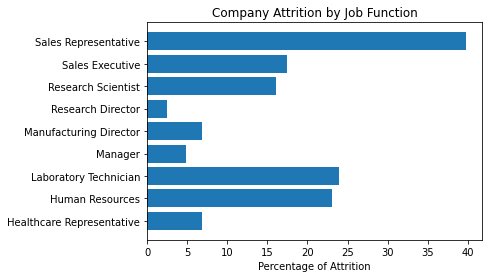

In [12]:
# Job Role
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i = 0
for field in list(ibm_df['JobRole'].unique()):
    ratio = ibm_df[(ibm_df['JobRole']==field)&(ibm_df['Attrition']=="Yes")].shape[0] / ibm_df[ibm_df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))

plot_data = df_JobRole.groupby(by="Job Role").sum().reset_index()
plt.barh(plot_data['Job Role'], plot_data['% of Leavers'])
plt.xlabel("Percentage of Attrition")
plt.title("Company Attrition by Job Function")
plt.show()

##### Age

In [13]:
(avg, sd) = norm.fit(ibm_df.loc[ibm_df['Attrition'] == 'Yes', 'Age'])
print('Terminated employees: average age = {:.1f} and standard deviation = {:.1f}'.format(avg, sd))

(avg, sd) = norm.fit(ibm_df.loc[ibm_df['Attrition'] == 'No', 'Age'])
print('Active employees: average age = {:.1f} and standard deviation = {:.1f}'.format(
    avg, sd))

Terminated employees: average age = 33.6 and standard deviation = 9.7
Active employees: average age = 37.6 and standard deviation = 8.9


In [9]:
# Add histogram data
x1 = ibm_df.loc[ibm_df['Attrition'] == 'No', 'Age'].dropna()
x2 = ibm_df.loc[ibm_df['Attrition'] == 'Yes', 'Age'].dropna()

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
colors = ['#1f77b4', '#ff7f0e'] 

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde',
                         show_hist=False,
                         show_rug=False)

# Plot 
fig.update_layout(
    title='Age Distribution by Attrition Status',
    xaxis=dict(
        title='Age',
        range=[15, 60],
        dtick=5
    ),
    yaxis=dict(
        title='Probability Density'
    )
)

fig.show()


In [15]:
import pandas as pd
import plotly.express as px

# Calculate % of leavers by education field
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])

for field in ibm_df['EducationField'].unique():
    total = ibm_df[ibm_df['EducationField'] == field].shape[0]
    leavers = ibm_df[(ibm_df['EducationField'] == field) & (ibm_df['Attrition'] == "Yes")].shape[0]
    ratio = (leavers / total) * 100
    df_EducationField.loc[len(df_EducationField)] = [field, ratio]

df_EducationField["% of Leavers"] = df_EducationField["% of Leavers"].astype(float)
df_EducationField["Label"] = df_EducationField["% of Leavers"].round(2)

# Sort by percentage
df_EducationField = df_EducationField.sort_values(by="% of Leavers", ascending=False)

# Plot
fig = px.bar(
    df_EducationField,
    x="Field",
    y="% of Leavers",
    title="Leavers by Education Field (%)",
    text="Label"
)

fig.update_layout(
    xaxis_title="Education Field",
    yaxis_title="Percentage of Leavers",
    xaxis_tickangle=-45
)

fig.show()


In [6]:
pd.crosstab(ibm_df['Attrition'], ibm_df['Age']).

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Attrition,,,,,,,,,,,,,,,,,,,,,
No,4,3,5,7,11,10,19,20,27,45,...,17,15,17,18,19,11,4,9,10,5
Yes,4,6,6,6,5,4,7,6,12,3,...,2,3,2,0,3,3,0,5,0,0


In [20]:
a_df = pd.DataFrame(ibm_df.groupby('Attrition').mean())
a_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [22]:
ibm_df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64